In [14]:
import tifffile
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Extract Locations from Tiff Filenames in data/raw

## Get the Paths to the Tiff Images

In [15]:
raw_dir = Path("../../data/raw")
raw_dir

WindowsPath('../../data/raw')

In [16]:
def get_tiffs(path: str):
    return list(Path(path).glob("*.tif"))

files = get_tiffs(raw_dir)
files[:5]

[WindowsPath('../../data/raw/ExPW021_PW162-A05_Scan1_[10275,40702]_component_data.tif'),
 WindowsPath('../../data/raw/ExPW021_PW162-A05_Scan1_[10275,41397]_component_data.tif'),
 WindowsPath('../../data/raw/ExPW021_PW162-A05_Scan1_[10275,42092]_component_data.tif'),
 WindowsPath('../../data/raw/ExPW021_PW162-A05_Scan1_[10275,42787]_component_data.tif'),
 WindowsPath('../../data/raw/ExPW021_PW162-A05_Scan1_[10275,43482]_component_data.tif')]

In [18]:
f"There are {len(files)} tiff files"

'There are 275 tiff files'

### Extract the x,y locations of each file from the Filename

In [21]:
def extract_locations(path):
    start = path.name.find("_[") + 2
    stop = path.name.find("]_")
    x, y = path.name[start:stop].split(',')
    return int(x), int(y)

f = files[10]
f.name, extract_locations(f)

('ExPW021_PW162-A05_Scan1_[10275,47651]_component_data.tif', (10275, 47651))

### Batch Process: Extract Locations for All Tiff Files into a DataFrame

In [20]:
raw_dir = Path("../../data/raw")
df = (pd.DataFrame({f: extract_locations(f) for f in get_tiffs(raw_dir)}, index=["X", "Y"])
.T
.astype(int)
.rename_axis(index="Files")
.reset_index()
)
df.head()

,Files,X,Y
0,"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,...",10275,40702
1,"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,...",10275,41397
2,"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,...",10275,42092
3,"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,...",10275,42787
4,"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,...",10275,43482


### Plot Point locations

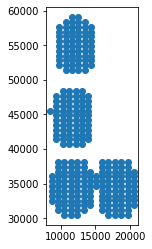

In [13]:
plt.scatter(x=df.X, y=df.Y)
plt.gca().set_aspect('equal')

## Identify Groups of Sections

In [1]:
from sklearn.cluster import KMeans

D:\miniconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\miniconda\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
D:\miniconda\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [1]:
from sklearn.cluster import KMeans
df['Label'] = KMeans(n_clusters=4).fit_predict(df)
plt.scatter(df.X, df.Y, c=df.Label);
plt.gca().set_aspect('equal');
df.sample(5)

ModuleNotFoundError: No module named 'sklearn'

In [157]:
df['Category'] = df.Label.apply(lambda idx: "ABCD"[idx])
df.head()

,X,Y,Label,Category
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,40702]_component_data.tif",10275,40702,1,B
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,41397]_component_data.tif",10275,41397,1,B
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,42092]_component_data.tif",10275,42092,1,B
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,42787]_component_data.tif",10275,42787,1,B
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,43482]_component_data.tif",10275,43482,1,B


In [163]:
from shutil import copy
for filename, row in df.iterrows():
    path = Path("../../data/processed/") / row['Category']
    path.mkdir(exist_ok=True, parents=True)
    new_filename = path / filename.name
    copy(filename, new_filename)
    